In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%run ../datos/datos.ipynb # me importo dataset

In [2]:
X_train, y_train, _, _ = datosConDistribucion(1000)

Descomentar para volver a correrlo

In [ ]:
# pca(X_train)

In [8]:
autovalores_ord = np.loadtxt(f'../pca/covarianza-c/autovalores_cov.txt')
autovectores_ord = np.loadtxt(f'../pca/covarianza-c/autovectores_cov.txt')

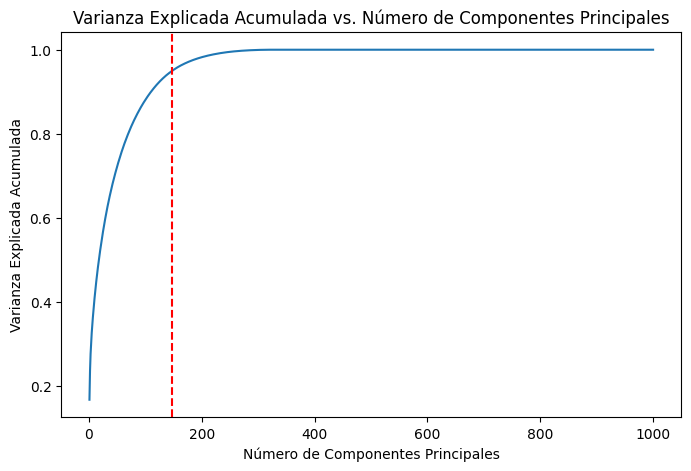

In [6]:
var_exp_acum = np.cumsum(autovalores_ord) / np.sum(autovalores_ord)


#cantidad de varianza explicada en función del número de componentes
plt.figure(figsize=(8, 5))

plt.plot(range(1, len(var_exp_acum) + 1), var_exp_acum,  linestyle='-')
plt.axvline(x=147, color='r', linestyle='--', label='Componente 147')
plt.title('Varianza Explicada Acumulada vs. Número de Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')

plt.savefig('../graficos/PCA-varianzaAcumulada.png')
plt.show()

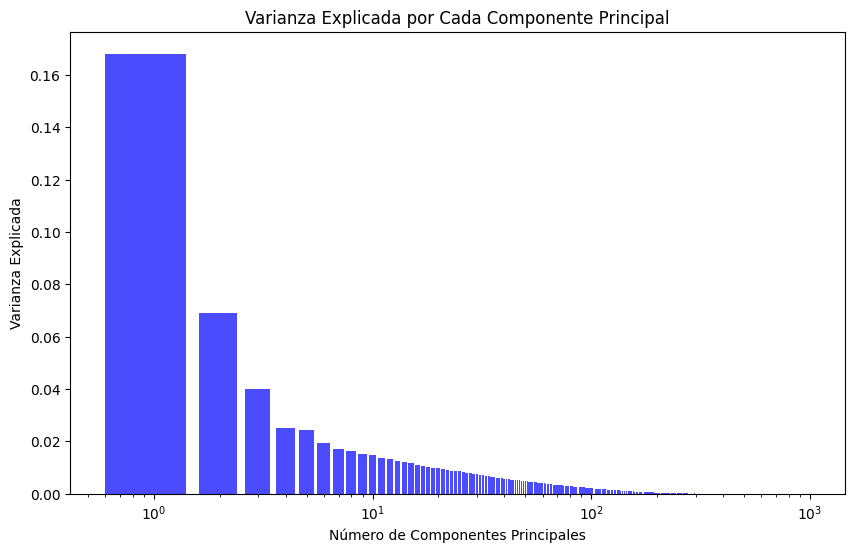

In [7]:
var_exp = autovalores_ord / np.sum(autovalores_ord)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.7, color='b')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')

# Cambiar la escala del eje x a logarítmica
plt.xscale('log')
plt.savefig('../graficos/varianza-explicada-cada-componente.png')
plt.show()

In [5]:
#Calculo la varianza explicada acumulada
var_exp_acum = np.cumsum(autovalores_ord) / np.sum(autovalores_ord)
#print(var_exp_acum)
#Encontrar el numero de componentes principales seleccionados mas del 95% varianza acumulada
p_sel = np.argmax(var_exp_acum >= 0.95)
print(p_sel)
# Selecciona solo las primeras p_sel componentes principales
comp_prin_sel = autovectores_ord[:, :p_sel]

#Nuevo conjunto reducido
x_train_red = np.dot(X_train, comp_prin_sel)
print(x_train_red.shape)

147
(320, 147)
